In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import networkx as nx
from networkx.algorithms import community

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('~/Downloads/OnlineTeaching_2.csv')

In [6]:
df.set_index(df['user_id'])

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,stripped_text
user_id,,,,,,,,,,,,,,,,,,,,,
2835944929,2835944929,1246242094638936065,2020-04-04T01:04:04Z,pgpittoni,"Grades are meaningless without feedback.\nSo, ...",Twitter for Android,219,NaN,NaN,NaN,...,449,2014-09-30T16:29:09Z,False,https://t.co/dHgVSPh2MC,http://www.paolapittoni.com,NaN,https://pbs.twimg.com/profile_banners/28359449...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5175207969...,"Grades are meaningless without feedback.\nSo, ..."
40054452,40054452,1246241329623060480,2020-04-04T01:01:01Z,PearsonNorthAm,Discover easy digital tools and tactics you ca...,Sprinklr,175,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Discover easy digital tools and tactics you ca...
40054452,40054452,1245010979085340678,2020-03-31T15:32:03Z,PearsonNorthAm,"With online engagement increasing, it's a good...",Sprinklr,172,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,"With online engagement increasing, it's a good..."
40054452,40054452,1244672238869262342,2020-03-30T17:06:01Z,PearsonNorthAm,10 ways to engage &amp; instruct students remo...,Sprinklr,159,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,10 ways to engage &; instruct students remotel...
40054452,40054452,1244229067743940614,2020-03-29T11:45:01Z,PearsonNorthAm,Working from home can be quite the adjustment....,Sprinklr,219,NaN,NaN,NaN,...,9830,2009-05-14T18:31:37Z,True,https://t.co/ABB3kFzkZy,https://www.pearson.com,NaN,https://pbs.twimg.com/profile_banners/40054452...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6840094151...,Working from home can be quite the adjustment....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136271795030560768,1136271795030560768,1243517870954500097,2020-03-27T12:38:58Z,keysforfitness,Putting work in on my canvas classes for my st...,Twitter for Android,266,NaN,NaN,NaN,...,292,2019-06-05T14:01:21Z,False,https://t.co/SZLyYQjWv3,http://www.keysforfitness.com,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/1136272492...,Putting work in on my canvas classes for my st...
1064767899498414080,1064767899498414080,1243512625612435458,2020-03-27T12:18:07Z,UsamaSh78048569,I need this type of luck to comprehend online ...,Twitter for Android,91,NaN,NaN,NaN,...,94,2018-11-20T06:30:24Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10647678...,NaN,http://pbs.twimg.com/profile_images/1229030300...,I need this type of luck to comprehend online ...
441078562,441078562,1243509274279632896,2020-03-27T12:04:48Z,M_Cainer,I feel it is important to reach out so I will ...,Twitter Web App,277,NaN,NaN,NaN,...,70,2011-12-19T18:28:55Z,False,https://t.co/FZqS0oY3Mt,http://www.matteocainer.com,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7691851795...,I feel it is important to reach out so I will ...


In [7]:
adj_matrix = pd.crosstab(df['user_id'].dropna().astype(int),df['reply_to_user_id'].dropna().astype(int))

In [8]:
idx = adj_matrix.columns.union(adj_matrix.index)
adj_matrix = adj_matrix.reindex(index = idx, columns=idx, fill_value=0)

In [9]:
graph = nx.from_pandas_adjacency(adj_matrix,create_using=nx.path_graph(10))

In [10]:
np.array(list(nx.average_neighbor_degree(graph).values())).mean()

1.271144278606965

In [11]:
nx.number_connected_components(graph)

71

In [12]:
nx.local_efficiency(graph)

0.007462686567164179

In [13]:
nx.global_efficiency(graph)

0.008023790820334418

In [14]:
nx.degree_histogram(graph)

[0, 109, 22, 2, 0, 1]

In [15]:
nx.density(graph)

0.00920210975199192

In [16]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 134\nNumber of edges: 82\nAverage degree:   1.2239'

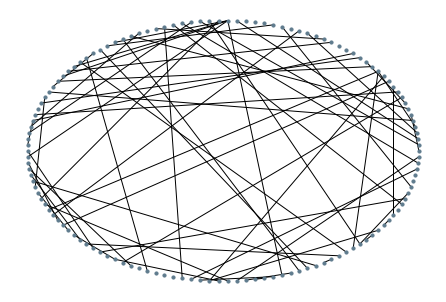

In [17]:
nx.draw_circular(graph,node_size=10,node_color='#607c8e')

Community analysis using Girvan-Newman Algorithm

In [18]:
comp = community.girvan_newman(graph)

In [19]:
communities = list(sorted(c) for c in next(comp))

In [20]:
sorted_communities = sorted(communities,key=len,reverse=True)

In [21]:
communities_distr = [len(x) for x in sorted_communities]

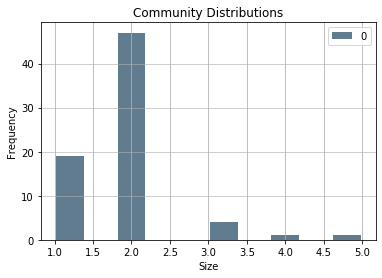

In [22]:
pd.DataFrame(communities_distr).plot.hist(grid=True, rwidth=0.9, color='#607c8e')
plt.title('Community Distributions')
plt.xlabel('Size')
plt.grid(axis='y', alpha=0.75)